In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
import matplotlib.pyplot as plt

# The Data Set

In [411]:
data = pd.read_csv('global_emmisions.csv')
data

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.73928,14506.97381,12242.62794,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.50660,14746.83069,12266.01629,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.55897,14725.97803,12345.65337,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.08573,14174.56401,11191.80855,7556.290283,1637.537532,407.583673,296.301685,4.497423


# Data Analysis

In [412]:
data.shape

(63104, 11)

In [413]:
data['Country'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [414]:
len(data['Country'].unique())

232

In [415]:
data['Country'].value_counts()

Afghanistan    272
Peru           272
Niger          272
Nigeria        272
Niue           272
              ... 
Greenland      272
Grenada        272
Guadeloupe     272
Guatemala      272
Global         272
Name: Country, Length: 232, dtype: int64

In [416]:
data['Year'].unique()


array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

In [417]:
len(data['Year'].unique())

272

In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [419]:
data.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.000000,62904.000000,21744.000000,21717.000000,21618.000000,20814.000000,21550.000000,1620.000000,18974.000000
mean,1885.500000,55.224788,73.968916,55.760624,23.504285,4.330443,1.712695,10.951389,4.413363
std,78.519728,824.845435,598.986992,519.034563,247.674772,50.305770,16.727067,39.034073,17.432815
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1817.750000,0.000000,0.000000,0.091600,0.000000,0.000000,0.000000,0.520885,0.197866
50%,1885.500000,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303949
75%,1953.250000,0.549342,6.736411,8.339752,0.581628,0.568502,0.000000,4.385471,5.077994
max,2021.000000,37123.850350,15051.512770,12345.653370,7921.829472,1672.592372,439.253991,306.638573,834.192642


# Data Preprocessing

In [420]:
data.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [421]:
data= data.fillna(0)
data

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,AFG,1751,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Afghanistan,AFG,1752,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Afghanistan,AFG,1753,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Afghanistan,AFG,1754,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.73928,14506.97381,12242.62794,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.50660,14746.83069,12266.01629,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.55897,14725.97803,12345.65337,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.08573,14174.56401,11191.80855,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [422]:
data = data[data['Country'] != 'Global']
data

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
62827,International Transport,XIT,2017,1230.506945,0.0,1230.506945,0.0,0.0,0.0,0.0,0.0
62828,International Transport,XIT,2018,1270.690768,0.0,1270.690768,0.0,0.0,0.0,0.0,0.0
62829,International Transport,XIT,2019,1249.558280,0.0,1249.558280,0.0,0.0,0.0,0.0,0.0
62830,International Transport,XIT,2020,938.508679,0.0,938.508679,0.0,0.0,0.0,0.0,0.0


In [423]:
data.isnull().sum()

Country               0
ISO 3166-1 alpha-3    0
Year                  0
Total                 0
Coal                  0
Oil                   0
Gas                   0
Cement                0
Flaring               0
Other                 0
Per Capita            0
dtype: int64

# Preprocessing for US

In [424]:
usa=data.query('Country == "USA"')
usa

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
59840,USA,USA,1750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59841,USA,USA,1751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59842,USA,USA,1752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59843,USA,USA,1753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59844,USA,USA,1754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
60107,USA,USA,2017,5210.957584,1308.479533,2314.675386,1460.391796,40.323535,59.245489,27.841845,15.800777
60108,USA,USA,2018,5376.657233,1256.201494,2365.283480,1618.720337,38.970745,72.786925,24.694251,16.187923
60109,USA,USA,2019,5259.143836,1070.723931,2358.831137,1673.999100,40.895869,88.383147,26.310652,15.730884
60110,USA,USA,2020,4715.691109,878.972885,2049.336500,1653.677852,40.687747,67.684371,25.331754,14.037218


In [425]:
usa=usa.fillna(0)

In [426]:
usa

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
59840,USA,USA,1750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59841,USA,USA,1751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59842,USA,USA,1752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59843,USA,USA,1753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59844,USA,USA,1754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
60107,USA,USA,2017,5210.957584,1308.479533,2314.675386,1460.391796,40.323535,59.245489,27.841845,15.800777
60108,USA,USA,2018,5376.657233,1256.201494,2365.283480,1618.720337,38.970745,72.786925,24.694251,16.187923
60109,USA,USA,2019,5259.143836,1070.723931,2358.831137,1673.999100,40.895869,88.383147,26.310652,15.730884
60110,USA,USA,2020,4715.691109,878.972885,2049.336500,1653.677852,40.687747,67.684371,25.331754,14.037218


In [427]:
usa = usa.rename(columns={'ISO 3166-1 alpha-3': 'ISO'})

In [428]:
usa_df =usa.drop(['Country', 'ISO'], axis=1)

In [429]:
usa_df

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
59840,1750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59841,1751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59842,1752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59843,1753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59844,1754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
60107,2017,5210.957584,1308.479533,2314.675386,1460.391796,40.323535,59.245489,27.841845,15.800777
60108,2018,5376.657233,1256.201494,2365.283480,1618.720337,38.970745,72.786925,24.694251,16.187923
60109,2019,5259.143836,1070.723931,2358.831137,1673.999100,40.895869,88.383147,26.310652,15.730884
60110,2020,4715.691109,878.972885,2049.336500,1653.677852,40.687747,67.684371,25.331754,14.037218


In [430]:
scaler = MinMaxScaler()
usa_df= pd.DataFrame(scaler.fit_transform(usa_df), columns=usa_df.columns)

In [431]:
usa_df

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.01107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.01476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
267,0.98524,0.849022,0.597576,0.875366,0.872397,0.860681,0.670326,0.858661,0.684577
268,0.98893,0.876019,0.573701,0.894505,0.966978,0.831806,0.823539,0.761587,0.701350
269,0.99262,0.856873,0.488994,0.892065,1.000000,0.872897,1.000000,0.811438,0.681549
270,0.99631,0.768328,0.401422,0.775020,0.987861,0.868455,0.765806,0.781248,0.608170


In [432]:
usa_df.columns

Index(['Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other',
       'Per Capita'],
      dtype='object')

In [433]:
cols = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']
usa_ff = usa_df[cols]
usa_ff

,Coal,Oil,Gas,Cement,Flaring,Other
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
267,0.597576,0.875366,0.872397,0.860681,0.670326,0.858661
268,0.573701,0.894505,0.966978,0.831806,0.823539,0.761587
269,0.488994,0.892065,1.000000,0.872897,1.000000,0.811438
270,0.401422,0.775020,0.987861,0.868455,0.765806,0.781248


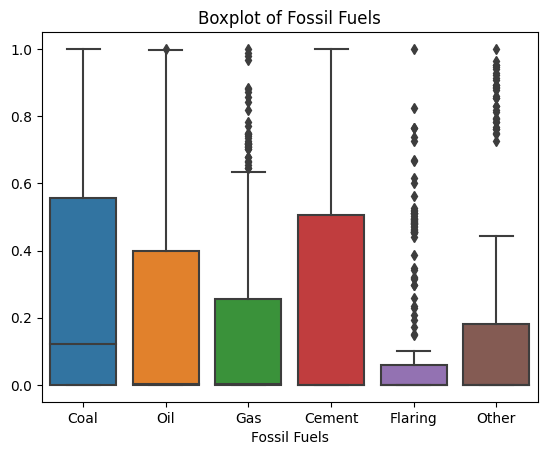

In [434]:
combo = pd.melt(usa_ff, var_name='Column', value_name='Value')
sns.boxplot(x='Column', y='Value', data=combo)
plt.title('Boxplot of Fossil Fuels')
plt.xlabel('Fossil Fuels')
plt.ylabel('')
plt.show()

- We are keeping these outliers because they are a part of a trend over time. We are going to try to create models using these outliers becuase they are an essential part of understanding the patterns. 

# Exploratory Data Analysis

In [477]:
data.groupby(['Country']).Total.sum().sort_values(ascending=False)[:20]

Country
USA                        421906.855203
China                      249352.817664
Russia                     117547.631435
Germany                     93290.503809
United Kingdom              78508.720102
Japan                       66711.083302
India                       57105.388563
International Transport     43062.671846
France                      39105.764962
Canada                      34115.395331
Ukraine                     30784.732638
Poland                      28196.094559
Italy                       25065.176247
South Africa                21465.099969
Mexico                      20587.507291
Iran                        19546.581041
Australia                   18968.830828
South Korea                 18927.931711
Saudi Arabia                16705.824729
Brazil                      16672.437860
Name: Total, dtype: float64

In [478]:
top_15 = data.groupby(['Country']).Total.sum().sort_values(ascending= False)[:15]
top_15

Country
USA                        421906.855203
China                      249352.817664
Russia                     117547.631435
Germany                     93290.503809
United Kingdom              78508.720102
Japan                       66711.083302
India                       57105.388563
International Transport     43062.671846
France                      39105.764962
Canada                      34115.395331
Ukraine                     30784.732638
Poland                      28196.094559
Italy                       25065.176247
South Africa                21465.099969
Mexico                      20587.507291
Name: Total, dtype: float64

In [479]:
x=data.groupby('Country').sum().sort_values(by='Total',ascending = False).index
y=data.groupby('Country').sum().sort_values(by='Total', ascending = False)['Total']
x=x[:15]
y=y[:15]
x,y


(Index(['USA', 'China', 'Russia', 'Germany', 'United Kingdom', 'Japan', 'India',
        'International Transport', 'France', 'Canada', 'Ukraine', 'Poland',
        'Italy', 'South Africa', 'Mexico'],
       dtype='object', name='Country'),
 Country
 USA                        421906.855203
 China                      249352.817664
 Russia                     117547.631435
 Germany                     93290.503809
 United Kingdom              78508.720102
 Japan                       66711.083302
 India                       57105.388563
 International Transport     43062.671846
 France                      39105.764962
 Canada                      34115.395331
 Ukraine                     30784.732638
 Poland                      28196.094559
 Italy                       25065.176247
 South Africa                21465.099969
 Mexico                      20587.507291
 Name: Total, dtype: float64)

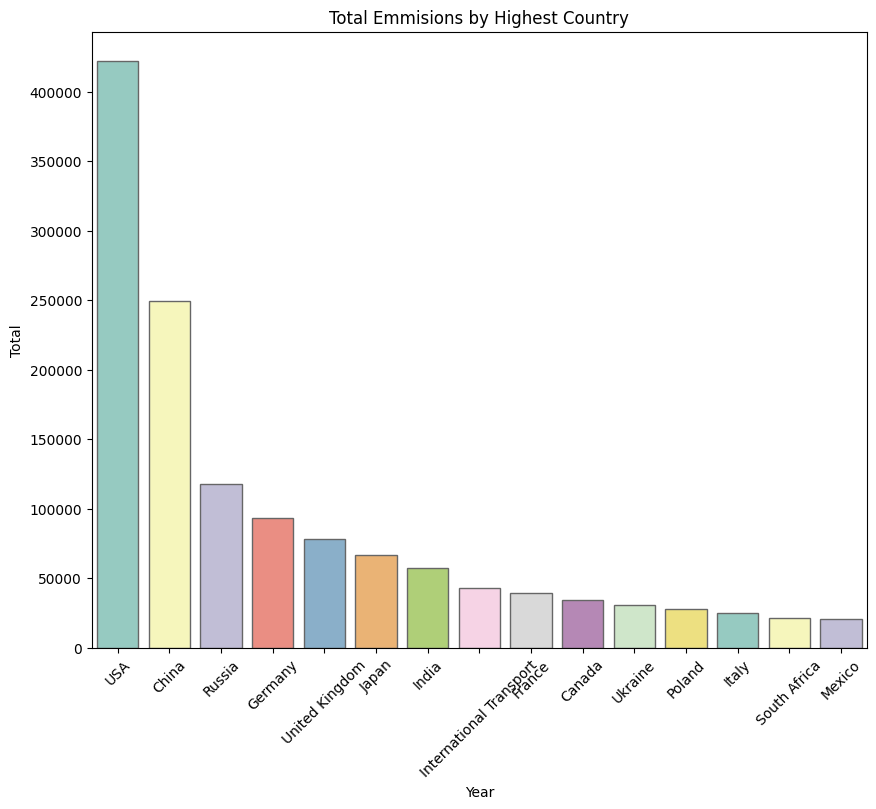

In [487]:
plt.figure(figsize=(10,8))
sns.barplot(x=x[:15], y=y[:15], palette ='Set3', edgecolor ='.4')
plt.title('Total Emmisions by Highest Country')
plt.xlabel('Year')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

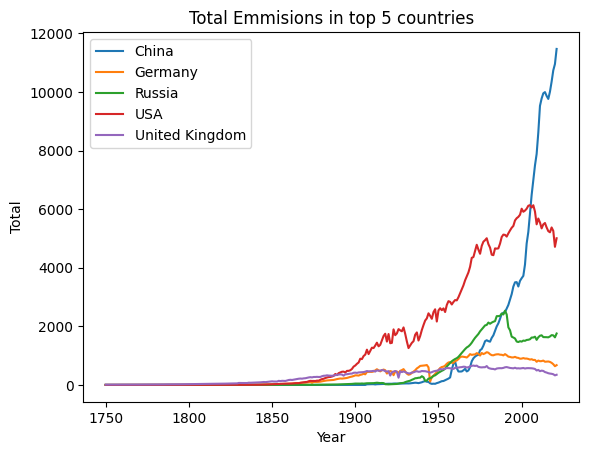

In [439]:
data_5=data[data['Country'].isin(['USA', 'China','Russia','Germany','United Kingdom'])]
grouped = data_5.groupby("Country")

for name, group in grouped:
    plt.plot(group['Year'], group['Total'], label=name)

plt.title('Total Emmisions in top 5 countries')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend()
plt.show()

In [441]:
# Emmisions in USA
usa_data=data.query('Country == "USA"')
usa_data

,Country,ISO,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
59840,USA,USA,1750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59841,USA,USA,1751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59842,USA,USA,1752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59843,USA,USA,1753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59844,USA,USA,1754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
60107,USA,USA,2017,5210.957584,1308.479533,2314.675386,1460.391796,40.323535,59.245489,27.841845,15.800777
60108,USA,USA,2018,5376.657233,1256.201494,2365.283480,1618.720337,38.970745,72.786925,24.694251,16.187923
60109,USA,USA,2019,5259.143836,1070.723931,2358.831137,1673.999100,40.895869,88.383147,26.310652,15.730884
60110,USA,USA,2020,4715.691109,878.972885,2049.336500,1653.677852,40.687747,67.684371,25.331754,14.037218


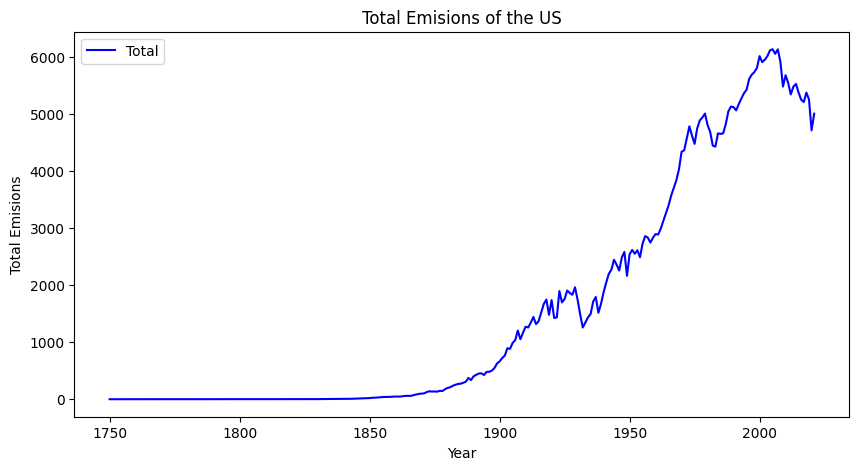

In [442]:
x = usa_data.plot(x= 'Year', y = 'Total', figsize =(10,5), color='blue')
x.set_ylabel('Total Emisions')
x.set_title('Total Emisions of the US')
plt.show()

In [443]:
fossil_fules = data[['Country','Year','Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']]
fossil_fules

,Country,Year,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,1750,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1751,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,1752,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,1753,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,1754,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
62827,International Transport,2017,0.0,1230.506945,0.0,0.0,0.0,0.0,0.0
62828,International Transport,2018,0.0,1270.690768,0.0,0.0,0.0,0.0,0.0
62829,International Transport,2019,0.0,1249.558280,0.0,0.0,0.0,0.0,0.0
62830,International Transport,2020,0.0,938.508679,0.0,0.0,0.0,0.0,0.0


In [444]:
usa_ff = fossil_fules.query ('Country == "USA"')
usa_ff =usa_ff.drop(columns=['Country'])
usa_ff

,Year,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
59840,1750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59841,1751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59842,1752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59843,1753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59844,1754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
60107,2017,1308.479533,2314.675386,1460.391796,40.323535,59.245489,27.841845,15.800777
60108,2018,1256.201494,2365.283480,1618.720337,38.970745,72.786925,24.694251,16.187923
60109,2019,1070.723931,2358.831137,1673.999100,40.895869,88.383147,26.310652,15.730884
60110,2020,878.972885,2049.336500,1653.677852,40.687747,67.684371,25.331754,14.037218


In [445]:
import pandas as pd
import matplotlib.pyplot as plt


In [446]:
fuel_data = usa_ff[['Year', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']]
fuel_data = usa_ff.sort_values(by='Year')


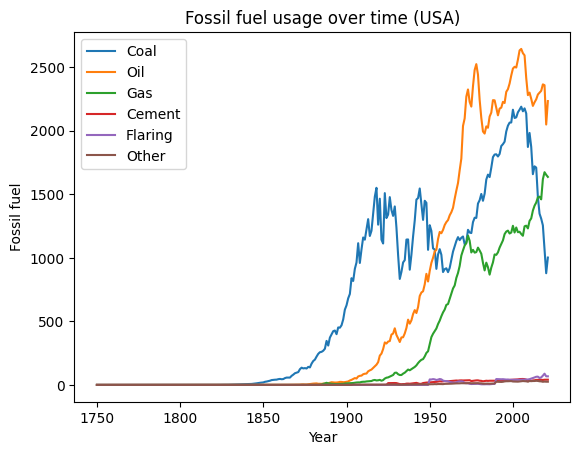

In [447]:
plt.plot(usa_ff['Year'], usa_ff['Coal'], label='Coal')
plt.plot(usa_ff['Year'], usa_ff['Oil'], label='Oil')
plt.plot(usa_ff['Year'], usa_ff['Gas'], label='Gas')
plt.plot(usa_ff['Year'], usa_ff['Cement'], label='Cement')
plt.plot(usa_ff['Year'], usa_ff['Flaring'], label='Flaring')
plt.plot(usa_ff['Year'], usa_ff['Other'], label='Other')

plt.xlabel('Year')
plt.ylabel('Fossil fuel')
plt.title('Fossil fuel usage over time (USA)')

plt.legend()
plt.show()


# Models

# Linear Regression

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [264]:
cols=['Total','Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']
usa_df = usa_df[cols]
usa_df


#cols = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']
#usa_ff = usa_df[cols]
#usa_ff

,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
267,0.849022,0.597576,0.875366,0.872397,0.860681,0.670326,0.858661
268,0.876019,0.573701,0.894505,0.966978,0.831806,0.823539,0.761587
269,0.856873,0.488994,0.892065,1.000000,0.872897,1.000000,0.811438
270,0.768328,0.401422,0.775020,0.987861,0.868455,0.765806,0.781248


In [286]:
X = usa_df[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']]
y = usa_df['Total']

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [288]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((217, 6), (55, 6), (217,), (55,))

In [289]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [290]:
y_pred = lr.predict(X_test)
y_pred

array([ 6.03730916e-01,  9.64361531e-01,  4.26666800e-01,  7.44249582e-03,
        7.86243473e-01,  2.05074599e-01,  8.99045375e-04,  2.04935706e-01,
        5.55187369e-05,  8.74213995e-01,  4.72059703e-01,  3.09035247e-01,
        4.61405358e-01,  2.16403685e-02,  2.45536098e-03, -1.43809964e-12,
       -1.43809964e-12,  1.24559328e-01,  6.56673235e-05,  3.10552552e-01,
       -1.43809964e-12,  9.65070887e-03,  4.62032479e-01,  2.07178923e-01,
        8.47705453e-05, -1.43809964e-12,  1.12709009e-03,  7.59602919e-01,
        4.14084306e-01,  9.96799930e-01,  6.92534713e-02,  1.34176254e-02,
        4.91430381e-03,  3.05491405e-01,  1.46856016e-04,  5.00815745e-02,
        8.16047961e-01,  5.74887580e-04,  9.13372778e-05,  9.99622615e-01,
        4.01346751e-03,  3.52721128e-01,  2.31958391e-01,  6.52315327e-03,
       -1.43809964e-12,  7.79628243e-01,  2.46961187e-01,  2.41944459e-01,
        6.25801193e-01, -1.43809964e-12,  8.25238584e-01,  4.68363850e-02,
       -1.43809964e-12,  

In [299]:
r2 = r2_score(y_test, y_pred)
r2

1.0

In [305]:
x = y_test
y = y_pred

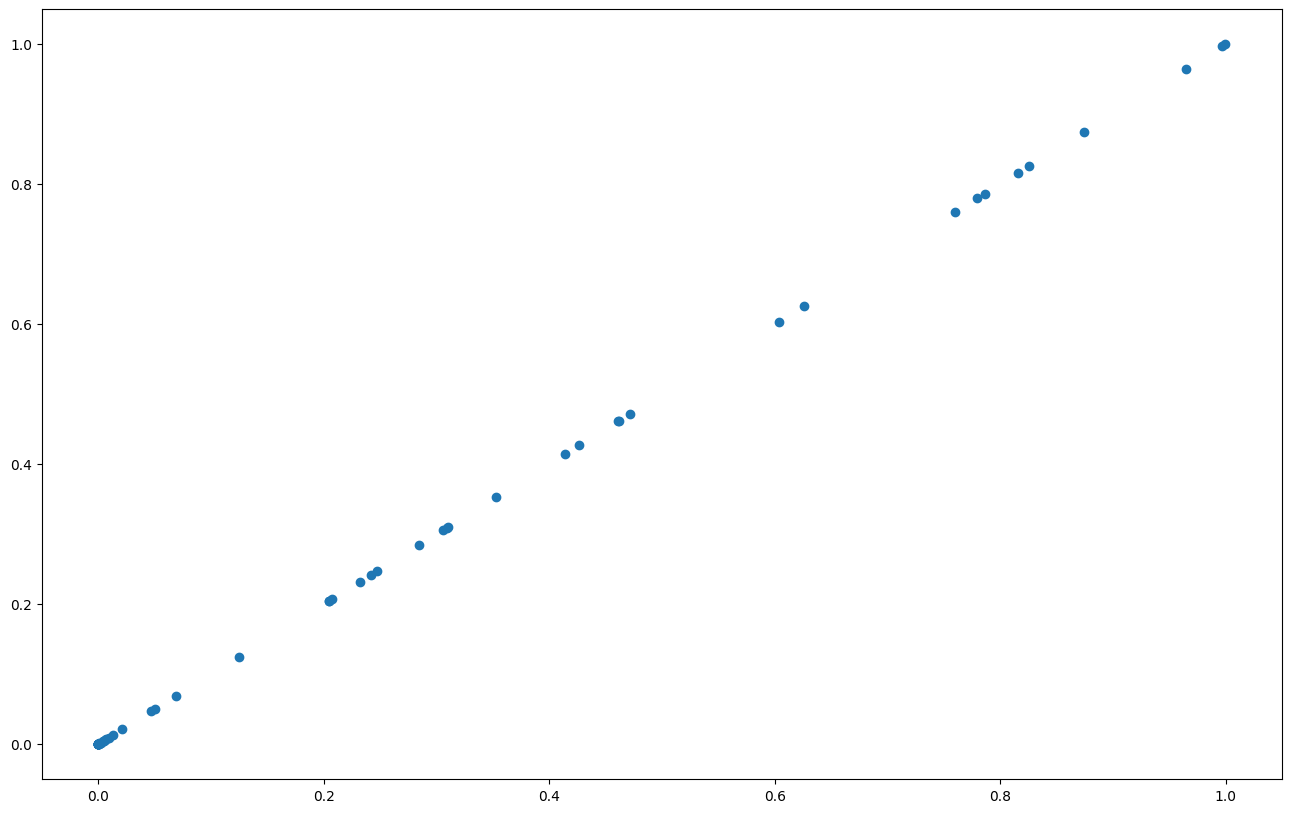

In [306]:
plt.figure(figsize=(16,10))
plt.scatter(x, y)
plt.show()

In [492]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=1)
rid.fit(X_train, y_train)

Ridge(alpha=1)

In [493]:
y_pred = rid.predict(X_test)
y_pred

array([0.61227217, 0.97063879, 0.42589442, 0.01198932, 0.75442493,
       0.19361707, 0.00611165, 0.20238164, 0.00534996, 0.87023256,
       0.48371888, 0.27934629, 0.47966506, 0.02471544, 0.00751698,
       0.00529983, 0.00529983, 0.11617288, 0.00535913, 0.3290947 ,
       0.00529983, 0.01396143, 0.46553403, 0.19589775, 0.00537638,
       0.00529983, 0.00631758, 0.73348429, 0.41025634, 1.00656396,
       0.06698075, 0.01736211, 0.00973737, 0.30593701, 0.00543244,
       0.04983149, 0.78634267, 0.00581894, 0.00538231, 1.01304398,
       0.00892393, 0.36298404, 0.21021507, 0.01119014, 0.00529983,
       0.75783113, 0.24545099, 0.24999502, 0.63390387, 0.00529983,
       0.81916015, 0.04700877, 0.00529983, 0.00549335, 0.2623001 ])

In [494]:
r22 = r2_score(y_test, y_pred)
r22

0.9986765203015061

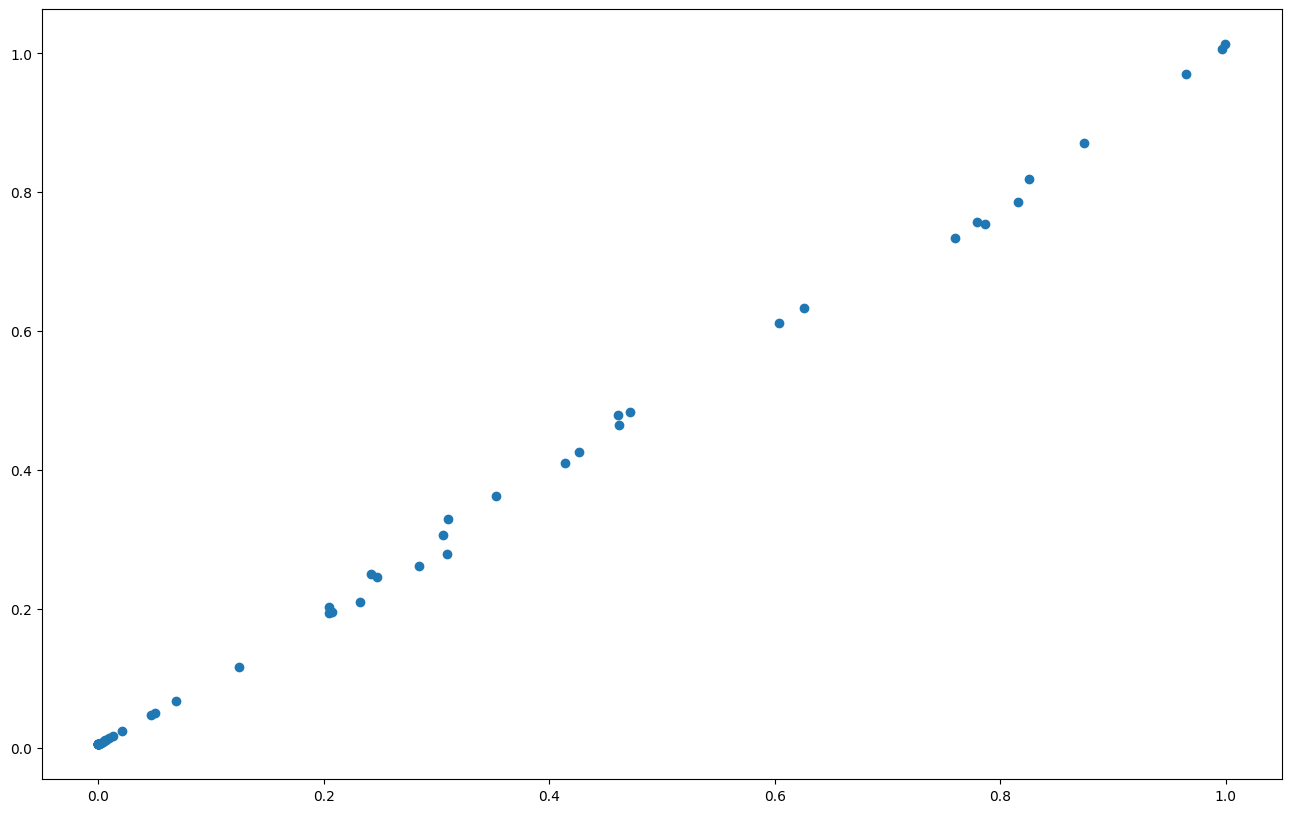

In [495]:
a= y_test
b = y_pred

plt.figure(figsize=(16,10))
plt.scatter(a, b)
plt.show()

In [502]:
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
print("Linear Regression MSE:", lr_mse)
print("Linear Regression RMSE:", lr_rmse)

Linear Regression MSE: 2.9013184039656855e-21
Linear Regression RMSE: 5.386388775390879e-11


In [497]:
x1=y_test
x2= range(len(x1))

y1=y_pred
y2= range(len(y1))

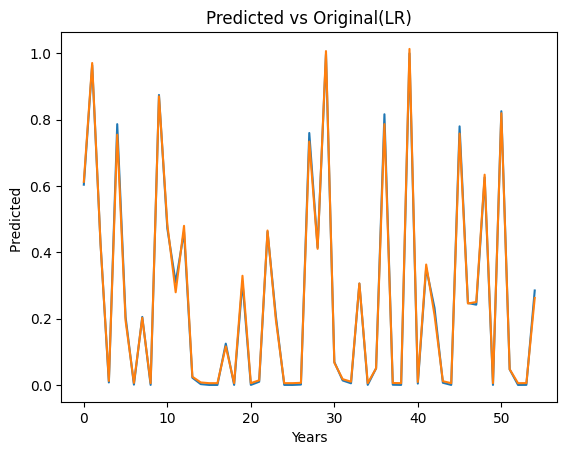

In [503]:
plt.plot(x2,x1)
plt.plot(y2,y1)
plt.xlabel('Years')
plt.ylabel('Predicted ')
plt.title('Predicted vs Original(LR)')
plt.legend
plt.show()

# Random Forest Regression

In [519]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [520]:
rf_reg_pred = rf_reg.predict(X_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
rf_reg_rmse = np.sqrt(rf_reg_mse)
print("Random Forest Regression MSE:", rf_reg_mse)
print("Random Forest Regression RMSE:", rf_reg_rmse)

Random Forest Regression MSE: 0.00018042776706582726
Random Forest Regression RMSE: 0.013432340342093304


In [521]:
print(y.shape)
print(rf_reg_pred.shape)

(15,)
(55,)


In [522]:
r2 = r2_score(y_test, rf_reg_pred)
r2

0.9982194014223715

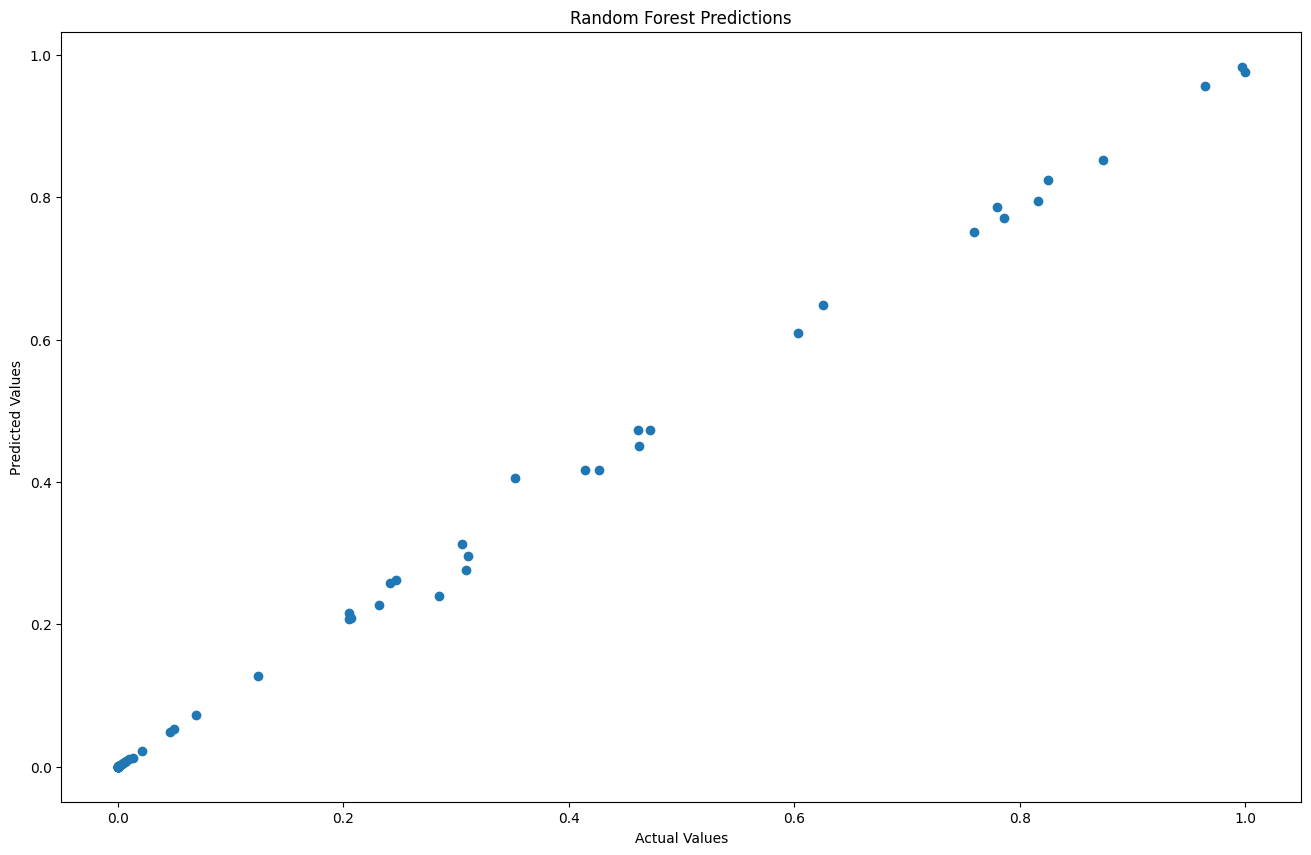

In [523]:
plt.figure(figsize=(16,10))
plt.scatter(y_test, rf_reg_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Random Forest Predictions')
plt.show()

In [509]:
x1=y_test
x2= range(len(x1))

y1=rf_reg_pred
y2= range(len(y1))

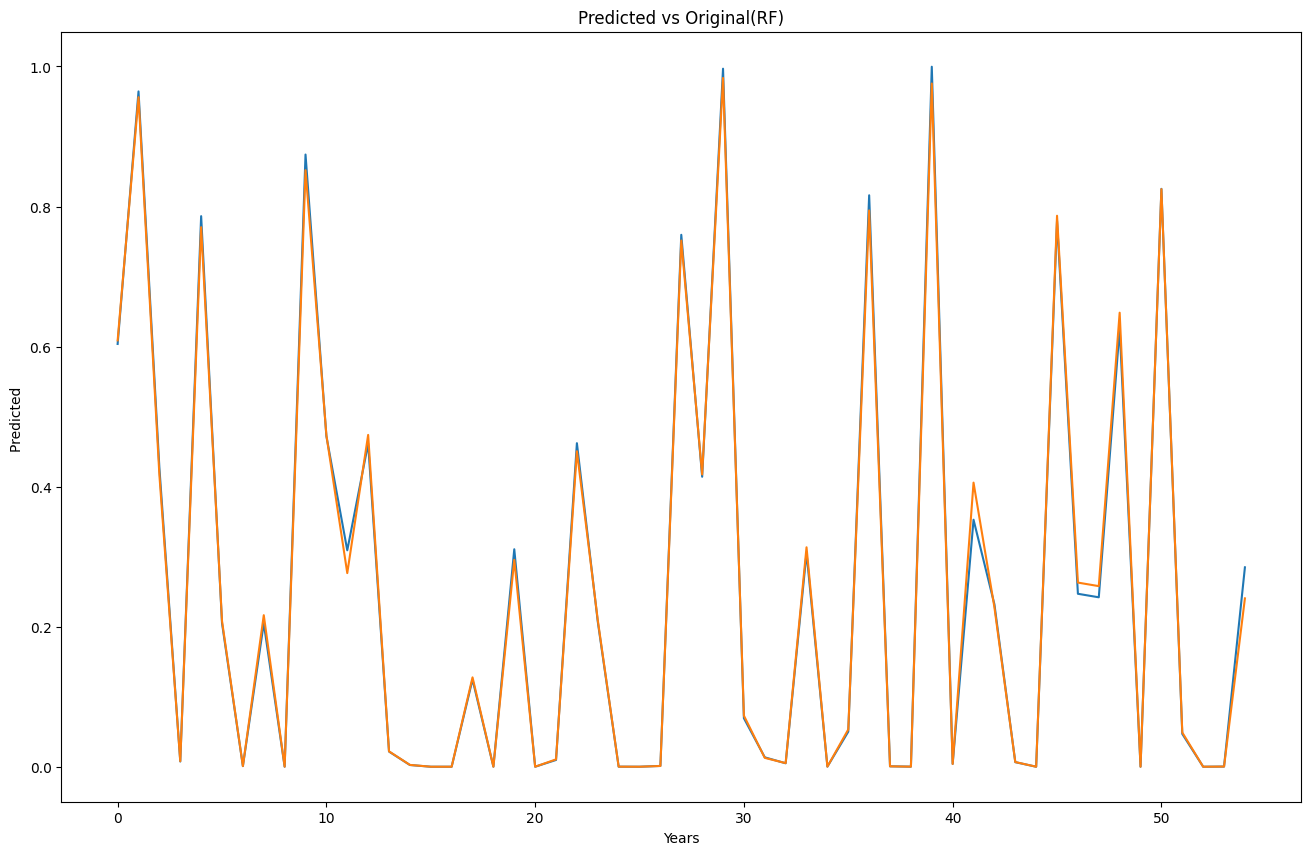

In [510]:
plt.plot(x2,x1)
plt.plot(y2,y1)
plt.xlabel('Years')
plt.ylabel('Predicted ')
plt.title('Predicted vs Original(RF)')
plt.legend
plt.show()

# Decision Tree Regression

In [511]:
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [512]:
dt_reg_pred = dt_reg.predict(X_test)
dt_reg_mse = mean_squared_error(y_test, dt_reg_pred)
dt_reg_rmse = np.sqrt(dt_reg_mse)
r2 = r2_score(y_test, dt_reg_pred)
print("Decision Tree Regression MSE:", dt_reg_mse)
print("Decision Tree Regression RMSE:", dt_reg_rmse)
print("R2 Score:",r2)


Decision Tree Regression MSE: 0.0003799171799993415
Decision Tree Regression RMSE: 0.019491464285664676
R2 Score: 0.9962506880103625


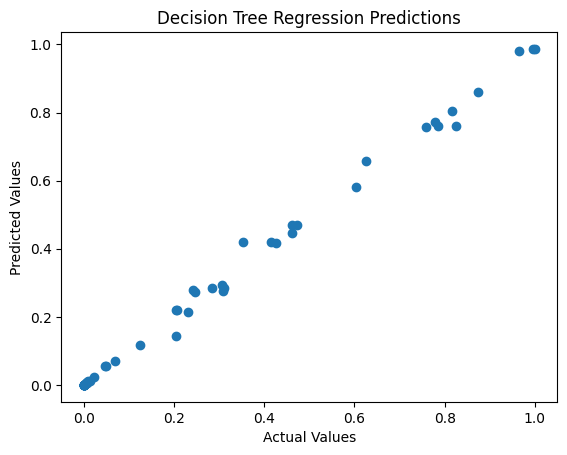

In [513]:
plt.scatter(y_test, dt_reg_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression Predictions')
plt.show()

In [514]:
x1=y_test
x2= range(len(x1))

y1=dt_reg_pred
y2= range(len(y1))

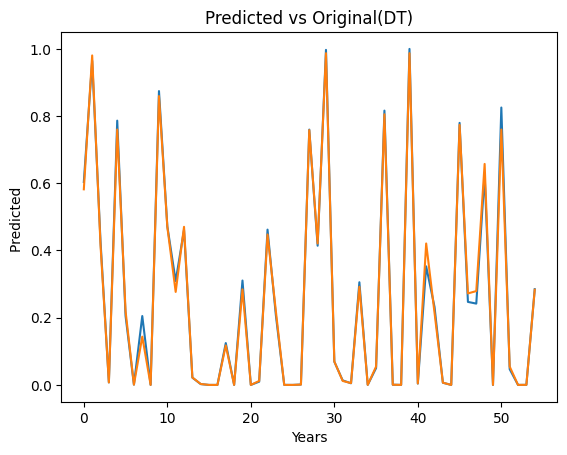

In [515]:
plt.plot(x2,x1)
plt.plot(y2,y1)
plt.xlabel('Years')
plt.ylabel('Predicted ')
plt.title('Predicted vs Original(DT)')
plt.show()